In [1]:
import numpy as np
import pandas as pd
from netpixi.integration.gt import *
from regression.integration.gt import *
import math
from graph_tool import centrality, clustering
import regression as reg
from model import Model, data_dir, file_save_name

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
dir_ = 'votacao/'
data_file_name = 'camara_municipal_sp_sessoes_12_20.csv'
name_file_name = 'nomes.csv'

data_file_dir = dir_ + data_file_name
name_file_dir = dir_ + name_file_name

In [3]:
df = pd.read_csv(data_file_dir)
nm = pd.read_csv(name_file_dir)
centros = ['PTB', 'PP', 'PPS', 'PDT', 'PV', 'PSB', 'PHS', 'MDB', 'REDE', 'CIDADANIA', 'S/PARTIDO']

In [34]:
rec_13_16 = pd.read_csv(data_dir + file_save_name + "_" + str(2013) + "_" + str(2016) + ".csv")

In [28]:
rec_13_16.drop(columns='Unnamed: 0', axis=1)

,id,betweenness,clustering,parlamentares,partido,extreme_party,success,gender
0,132,0.002700,0.901596,0.027027,PP,0,0.902174,0
1,155,0.005679,0.850679,0.175676,PT,1,0.896406,0
2,176,0.000516,0.896667,0.094595,PV,0,0.873239,0
3,179,0.002017,0.926263,0.027027,PDT,0,0.914062,0
4,187,0.004122,0.911111,0.148649,PSDB,1,0.497908,0
...,...,...,...,...,...,...,...,...
69,2108,0.017473,0.855180,0.094595,PV,0,0.921569,0
70,2127,0.004801,0.873227,0.081081,PTB,0,0.906367,0
71,2129,0.003053,0.896277,0.027027,DEMOCRATAS,1,0.906977,0
72,2131,0.003702,0.886179,0.027027,PHS,0,0.815789,0


# Modelo A

In [80]:
reg_clu__rep_2013_2016 = reg.linear(data=rec_13_16, formula='clustering ~ parlamentares + gender')
display(reg_clu__rep_2013_2016.micro_summary())

variable,coefficient,std error,p-value
parlamentares,0.703954,0.421104,0.098988
gender,0.059151,0.076098,0.439562


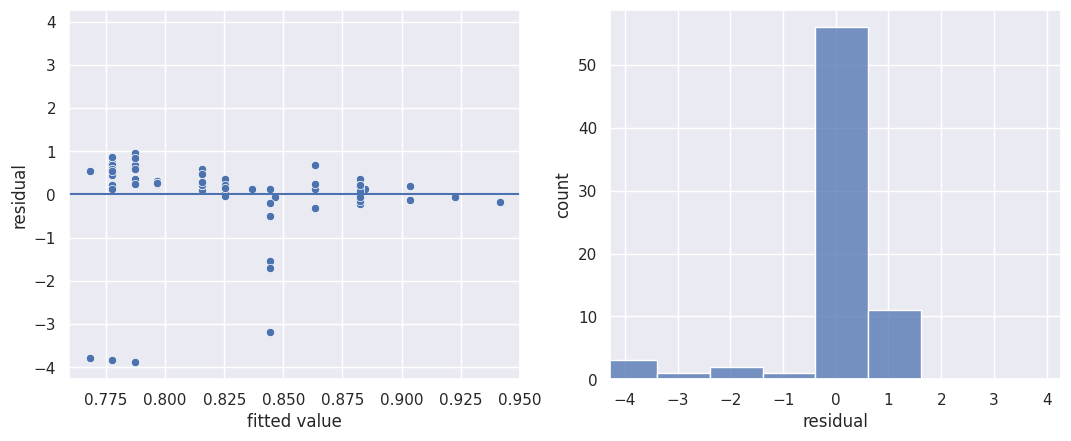

In [81]:
reg_clu__rep_2013_2016.plot_residuals()

# Modelo B

In [93]:
reg_clu__ep_2013_2016 = reg.linear(data=rec_13_16, formula='clustering ~ extreme_party + gender')
display(reg_clu__ep_2013_2016.micro_summary())

variable,coefficient,std error,p-value
extreme_party,-0.014131,0.053586,0.792768
gender,0.073378,0.077801,0.348802


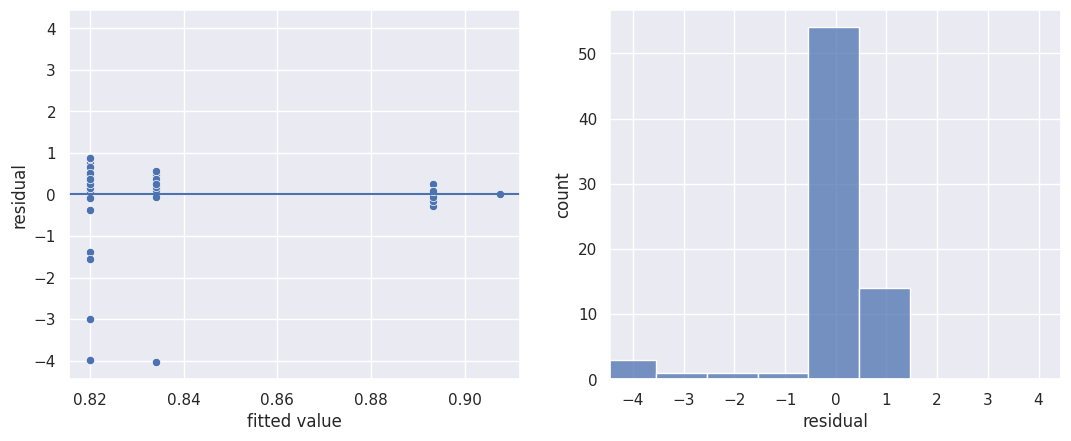

In [94]:
reg_clu__ep_2013_2016.plot_residuals()

# Modelo C

In [99]:
reg_bet__rep_2013_2016 = reg.linear(data=rec_13_16, formula='betweenness ~ parlamentares')
display(reg_bet__rep_2013_2016.micro_summary())

variable,coefficient,std error,p-value
parlamentares,0.073364,0.082388,0.376180


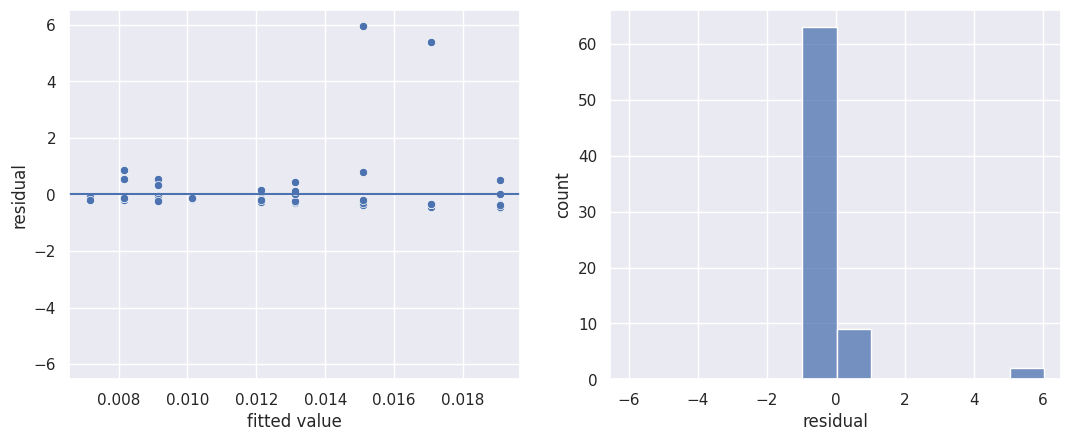

In [100]:
reg_bet__rep_2013_2016.plot_residuals()

# Modelo D

In [101]:
reg_clu__rep_ep_2013_2016 = reg.linear(data=rec_13_16, formula='clustering ~ parlamentares + extreme_party + gender')
display(reg_clu__rep_ep_2013_2016.micro_summary())

variable,coefficient,std error,p-value
parlamentares,0.842070,0.448983,0.064894
extreme_party,-0.050236,0.056069,0.373342
gender,0.065797,0.076564,0.393068


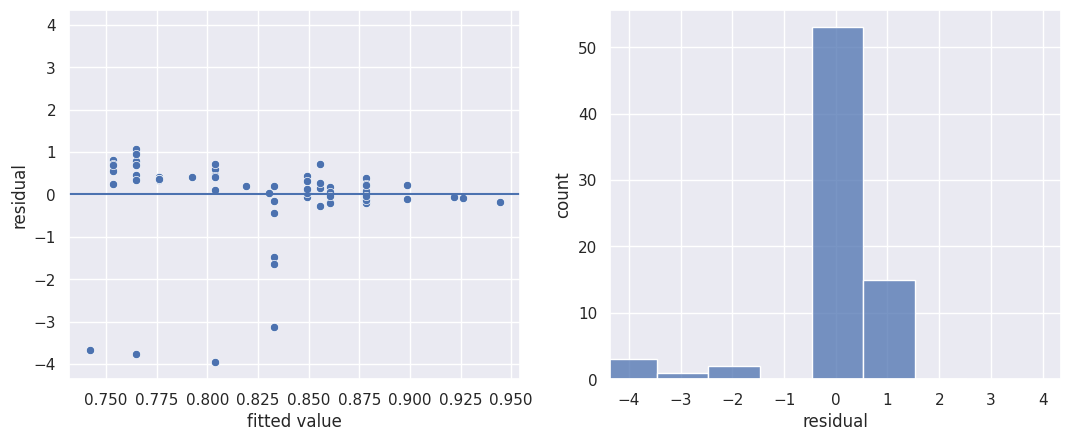

In [102]:
reg_clu__rep_ep_2013_2016.plot_residuals()